<a href="https://colab.research.google.com/github/Big-Shu-Nim/Unsupervised-Machine-Learning/blob/main/220307_Clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bitly/fruits_300_data -o fruits_300.npy

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-09 05:03:57--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-09 05:03:57--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-09 05:03:57--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fruits=np.load('fruits_300.npy')

In [ ]:
print(fruits.shape)

(300, 100, 100)


(cases, height, width)

In [ ]:
print(fruits[0,  0, :])
#NOte 2차원자료에서는 항상 행과열순인데 3차원의 이미지는 높이(열) 너비(행)로 나오니까 좀 헷갈린다

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


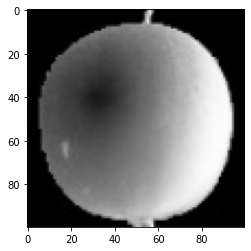

In [ ]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

In [ ]:
#픽셀 값이 높을수록 색감은?
#픽셀 낮을수록 색감은?
#정답은 다음 다음 코드 아래에 있다.

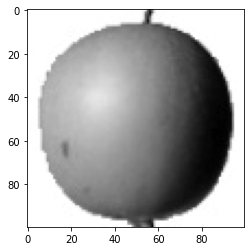

In [ ]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

In [ ]:
#++ white -- black

In [ ]:
 # 컴퓨터와 사람이 인식하는 객체는 다르다는 기본적인 가르침 겟겟

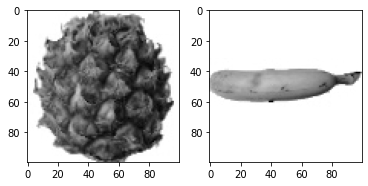

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [ ]:
apple = fruits[0:100].reshape(-1, 100*100)
# 첫버째 차원을 -1을 하는게 무슨 의미인지 모르겠다. 
https://rfriend.tistory.com/345

In [ ]:
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [ ]:
print(apple.shape)

(100, 10000)


In [ ]:
print(apple.mean(axis=1)) #아까 전부다 값을 flatten  해버려서 가로로 해줘야한다.

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


<function matplotlib.pyplot.show>

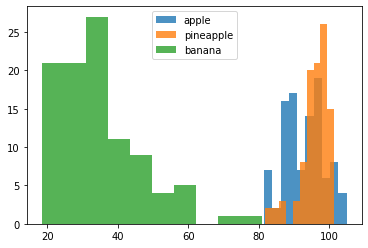

In [ ]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show

<function matplotlib.pyplot.show>

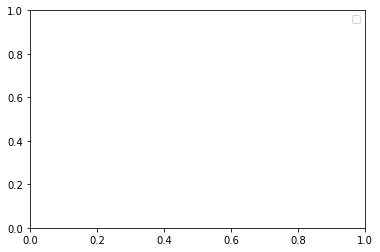

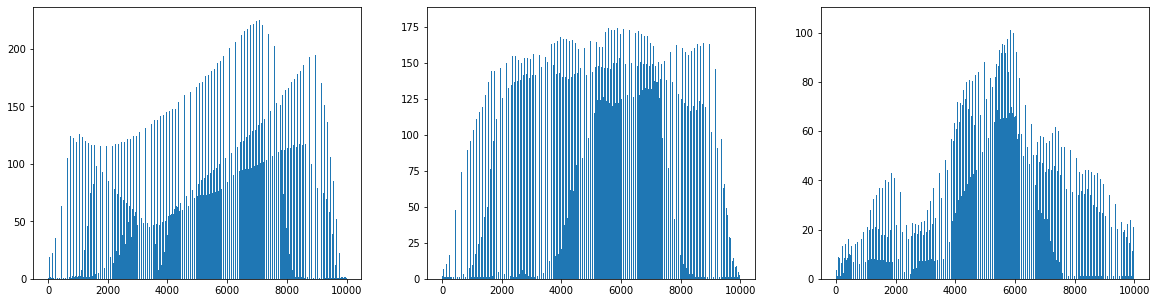

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

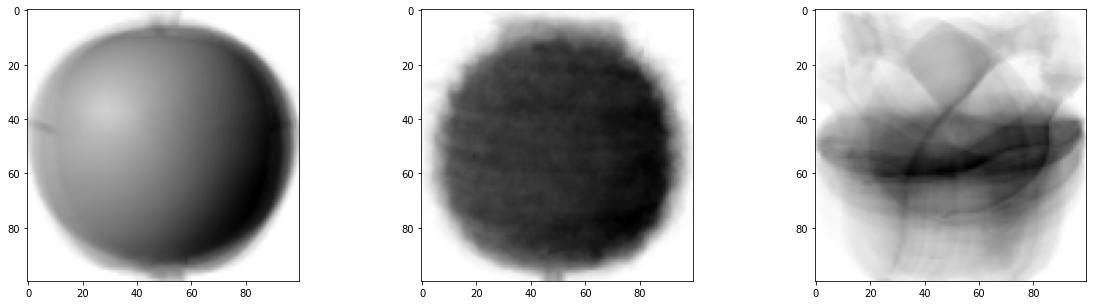

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs= plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [ ]:
abs_diff=np.abs(fruits-apple_mean)
abs_mean=np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


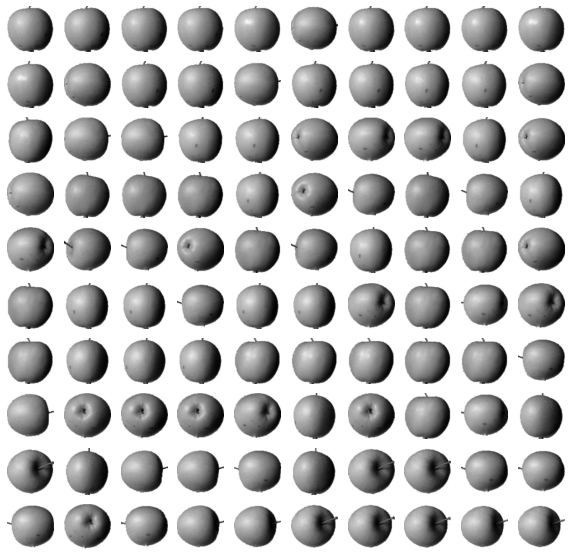

In [ ]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

## (2/3) 22.03.08

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fruits = np.load('fruits_300.npy')
#a method to road a npy file from np

In [ ]:
print(fruits.shape)

(300, 100, 100)


In [ ]:
print(fruits[0,0,:])
#A row in a 3-d array

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


<function matplotlib.pyplot.show>

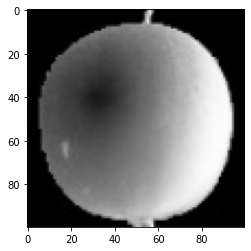

In [ ]:
plt.imshow(fruits[0], cmap='gray')
plt.show

Quick Question 

Why this applae has white color in it? 


- when you take a phote of an apple, you might see the picture like this.

<function matplotlib.pyplot.show>

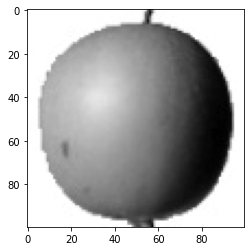

In [ ]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show

See? what's important to us is the apple that has a sort of gray color. 

However, for computer, the color of gary , anything black, has a low number such as 0. This makes all of computing useless. So if you want to use algorithm or calculate more, the digit 0 is suck. 

So by reversing the image, it allows for computer to take apple is important. 

<function matplotlib.pyplot.show>

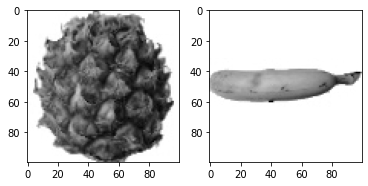

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show

In [ ]:
# reshape 3d array to 1d array 
apple = fruits[0:100].reshape(-1, 100*100)
pineapple= fruits[100:200].reshape(-1, 100*100)
banana= fruits[200:300].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


In [ ]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [ ]:
fruits_list=[apple, pineapple, banana]
for i in range(fruits_list):
  plt.hist(np.mean(fruits_list, axis=1), aplpha=0.8)
#이게 왜 안될까?

TypeError: ignored

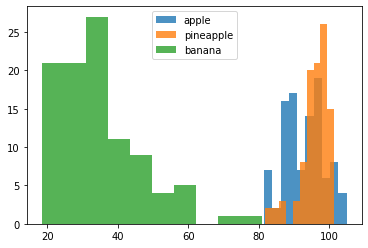

In [ ]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

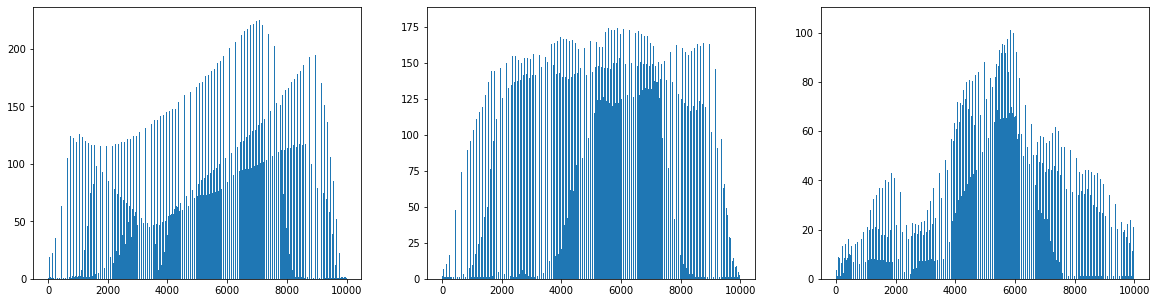

In [ ]:
fig, axs=plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

In [ ]:
# 많이 들어가는 픽셀에 따르는 세가지 분류 


<function matplotlib.pyplot.show>

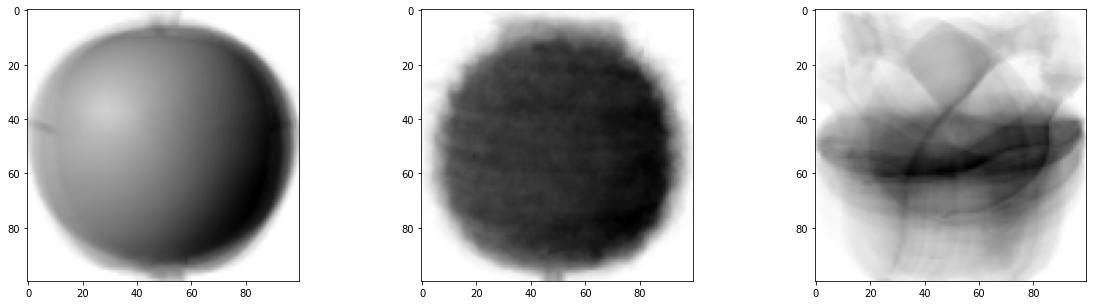

In [ ]:
apple_mean=np.mean(apple,axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple, axis=0).reshape(100,100)
banana_mean=np.mean(banana, axis=0).reshape(100,100)
fig, axs= plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show

In [ ]:
abs_diff=np.abs(fruits-apple_mean)
abs_mean= np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


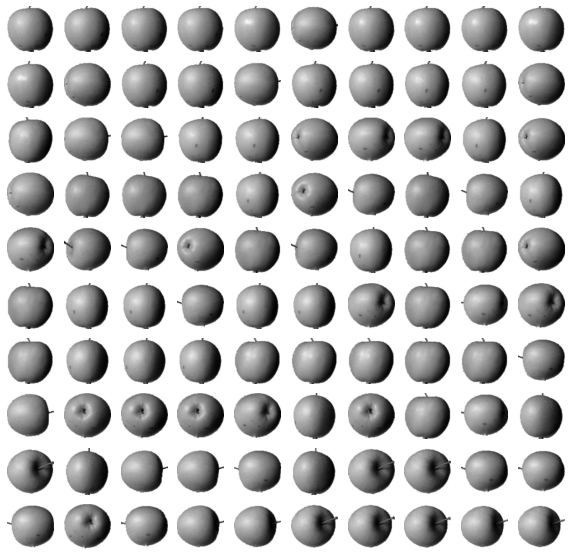

In [ ]:
apple_index= np.argsort(abs_mean)[:100]
fig, axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

# (3/3) 22.03.09

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fruits= np.load('fruits_300.npy')


In [5]:
print(fruits.shape)

(300, 100, 100)


In [6]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


<function matplotlib.pyplot.show>

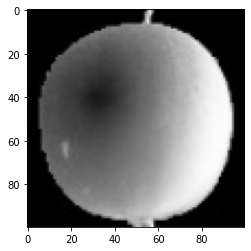

In [11]:
plt.imshow(fruits[0], cmap='gray')
plt.show

<function matplotlib.pyplot.show>

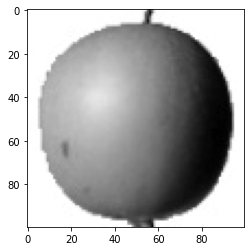

In [13]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show

In [ ]:
# In this case the dark part of apple has high number of pixels
#relatively bright side has lower number of pixels.
# Why? becasue normally I learn high pixels means bright low pixels mean dark.
#p.292

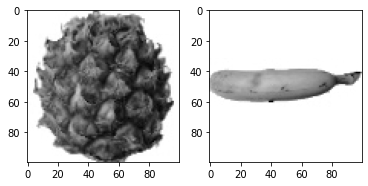

In [14]:
fig, axs= plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()


In [16]:
apple= fruits[1:100].reshape(-1, 100*100)
pineapple=fruits[100:200].reshape(-1, 100*100)
banana=fruits[200:300].reshape(-1, 100*100)
#why the number doesn't beigin with [0]??

In [17]:
print(apple.shape)

(99, 10000)


In [19]:
print(apple.mean(axis=1))

[ 97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999  90.681
  81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019  88.9827
 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495  94.1179
  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744  97.7641
  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492  90.711
 102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709  96.8163
  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268  93.799
  97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159 102.8453
  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022  82.446
  87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252  87.3867
  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604  81.9424
  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823 101.556
 100.7027  91.6098  88.8976]


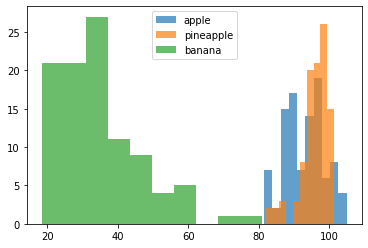

In [21]:
plt.hist(apple.mean(axis=1), alpha=0.7)
plt.hist(pineapple.mean(axis=1), alpha=0.7)
plt.hist(banana.mean(axis=1), alpha=0.7)
plt.legend(['apple','pineapple','banana'])
plt.show()

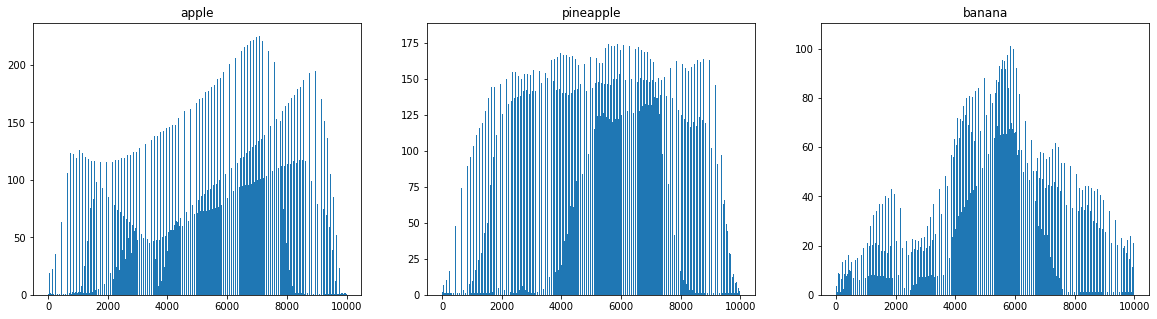

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

axs[0].set_title('apple')
axs[1].set_title('pineapple')
axs[2].set_title('banana')
plt.show()

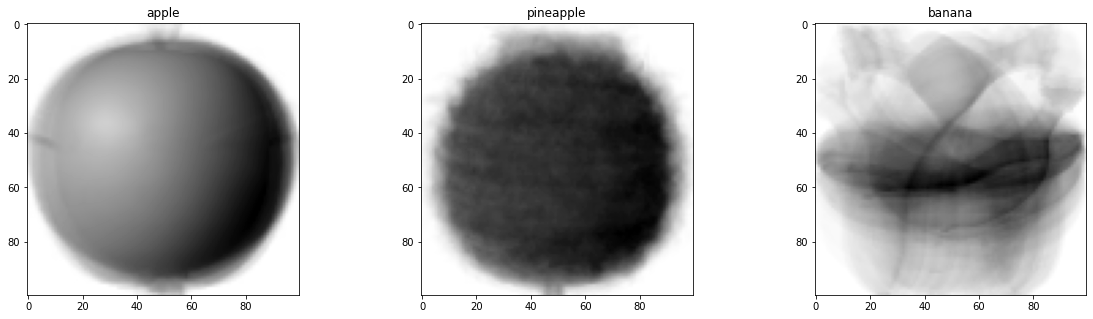

In [28]:
apple_mean=np.mean(apple, axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple, axis=0).reshape(100,100)
banana_mean=np.mean(banana, axis=0).reshape(100,100)
fig, axs= plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
axs[0].set_title('apple')
axs[1].set_title('pineapple')
axs[2].set_title('banana')
plt.show()

In [29]:
abs_diff=np.abs(fruits-apple_mean)
abs_mean=np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


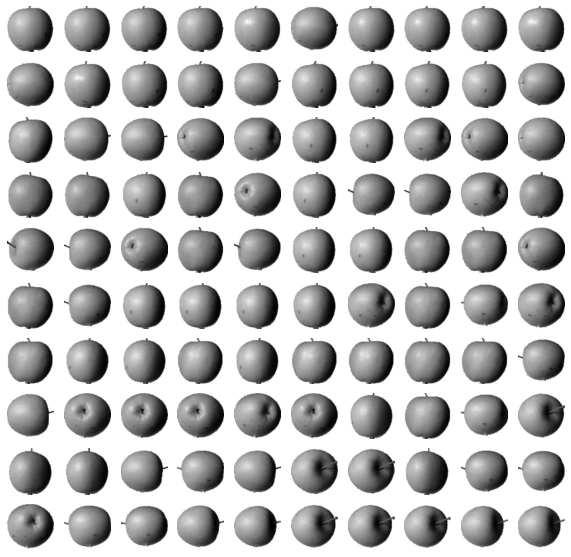

In [31]:
apple_index= np.argsort(abs_mean)[:100]
fig, axs= plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

사과 사진들 픽셀의 평균값에서 전체 이미지 파일 차이를 뺀 결과가 어째서
사과에 가까울수 있는지 처음에 이해가 안되었다. 

헷갈리는 지점은 이미지로 이야기하는것과 수로 이야기하는것 충돌이 일어 났기 떄문

나의 뇌: 전체 사진 - 사과 사진 = 바나나, 파인애플 이잖아? 그러면 바나나, 파인애플 아닌가?

오류: 전체 사진- 사과 사진이 아니라 전체 사진들의 픽셀값 - 사과 사진 평균들의 픽셀값





이해가 안되었던것
abs_mean= np.mean(abs_diff, axis=(1,2)) 
이렇게 다른차원의 값들을 가지는 것을 하나차원으로 바꾸고 그것을 평균낸것을 해본적이 없었다.
그래서 저 계산식이 어떻게 돌아가는지 그림이 안그러졌었다.
  -- 지금까지 나의 상식으로는 2차원을 1차원으로 바꿀때 2차원의 값들을 서로 곱해서 1d로 바꾸었다. 여기에 가정해서 생각하면 axis=(1,2)를 지정하면 튜플끼리 곱을 하고 그것의 평균 값을낸게 나온다. 

  300개의 이미지 파일이 나오는데 사과값과 많이 비슷했다면 남아 있는 값이 적을것이고 다르다면 클것이다. 그러므로 차이가 가장 적은 하위 100개는 사과이다. 